# Machine Learning: Regression Model Development
<br>
Karen Itzell Larios Inzunza <br>

DAT-5303-FMsBA2 Hult International Business School<br><br><br>

<h2>Introduction: </h2> Analysis of the database of Apprentice Chef in order to understand how much revenue to expect from each customer. The insights provided come from the development of a machine learning model using different variables that are used to predict revenue.

# 1. Initial Exploration of the Data

The very first thing is to import the necessary libraries, set the printing options and load the dataset.
The data could be checked just to make sure that it has loaded correctly, also the information to see what type of data it is and if it's necessary to make some transformations.

In [1]:
# importing libraries
import numpy as np
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = '/Users/karenlarios/Desktop/Larios_Karen_A1_Regression_Analysis/Apprentice_Chef_.xlsx'


# reading the file into Python
Apprentice_Chef = pd.read_excel(file)


# checking the file
#Apprentice_Chef.head(n = 5)

In [2]:
#Apprentice_Chef.info()

In [3]:
# descriptive statistics for numeric data
Apprentice_Chef.describe(include = 'number').round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


<br><h2> 1.1 Creating a Histogram for Revenue </h2>

In order to see how revenue is distributed a histogram plot is created.

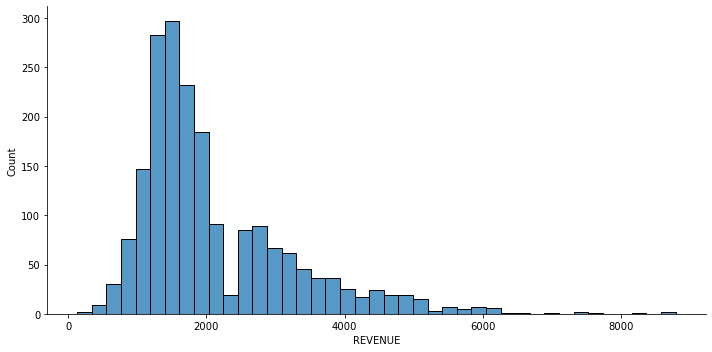

In [4]:
# developing a histogram using DISPLOT
sns.displot(data   = Apprentice_Chef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

We can see that the histogram is right skewed which means that is skewed positive.

Log10 will be used to see if there is a transformation in the histogram.

In [5]:
# log transforming Sale_Price and saving it to the dataset
Apprentice_Chef['log_REVENUE'] = np.log10(Apprentice_Chef['REVENUE'])

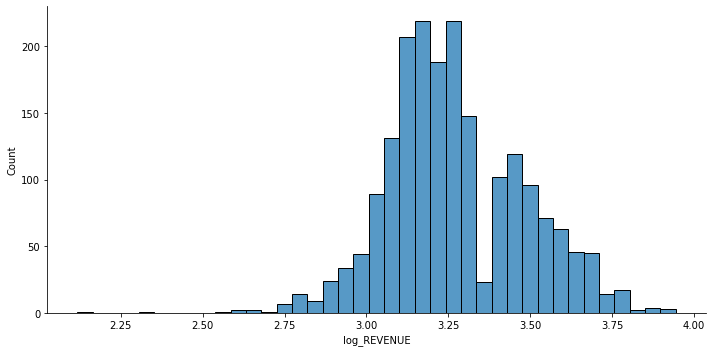

In [6]:
#Creating a histogram using log_REVENUE
sns.displot(data = Apprentice_Chef,
            x = 'log_REVENUE',
            height = 5,
            aspect = 2)

plt.show()

After transforming the data using Log10, the histogram shifted from right to left skewed. 

A more deeper analysis will be made to see if the logarithmic function will be used.

<br><h2> 1.2 Creating Scatterplots for each variable </h2>

The creation of Scatterplots were made in order to understand each variable and to be able to see they behaviour and their data type.

Text(0, 0.5, 'Revenue')

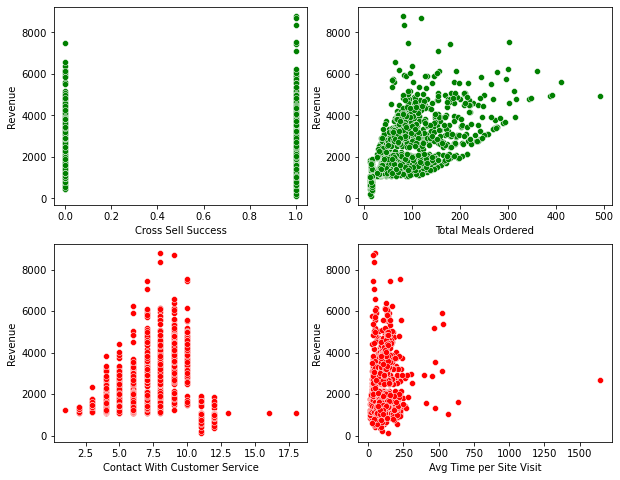

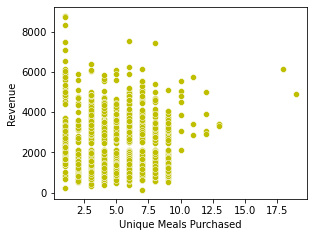

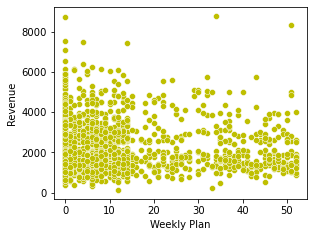

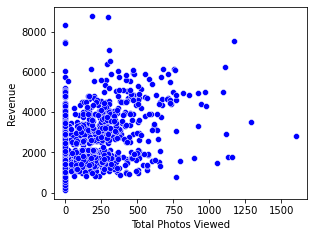

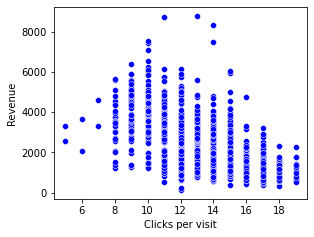

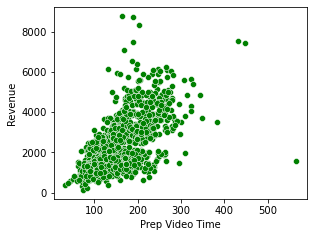

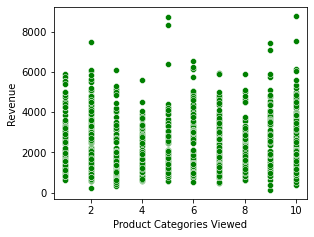

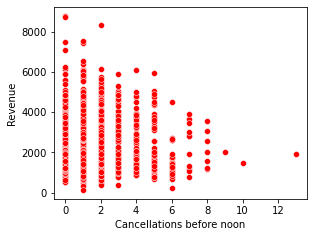

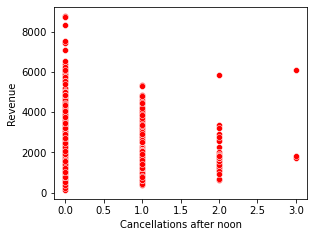

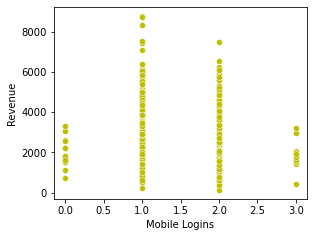

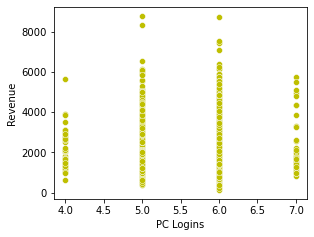

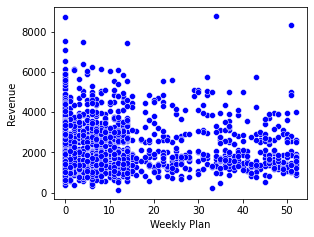

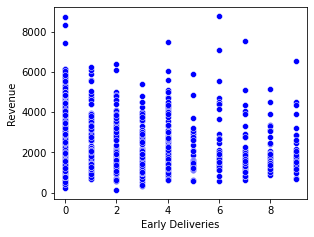

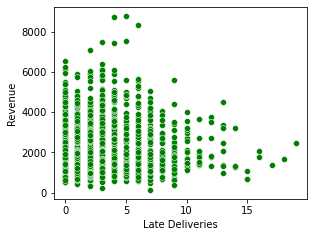

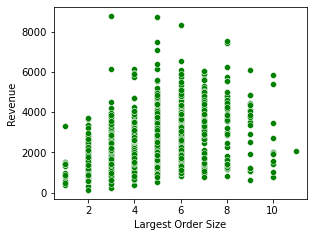

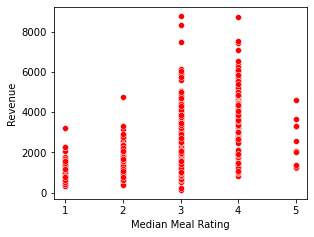

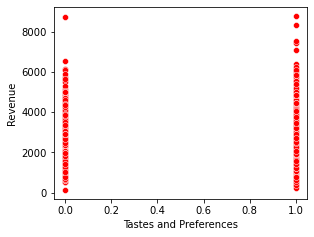

In [7]:
#Creating scatterplots to identify the data type of the different variables 
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Chef['CROSS_SELL_SUCCESS'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cross Sell Success')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Chef['TOTAL_MEALS_ORDERED'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')

########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = Apprentice_Chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Contact With Customer Service')
plt.ylabel(ylabel = 'Revenue')

########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Chef['AVG_TIME_PER_SITE_VISIT'],
                y = Apprentice_Chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Avg Time per Site Visit')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = Apprentice_Chef['UNIQUE_MEALS_PURCH'],
                y = Apprentice_Chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purchased')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = Apprentice_Chef['WEEKLY_PLAN'],
                y = Apprentice_Chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Weekly Plan')
plt.ylabel(ylabel = 'Revenue')


########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = Apprentice_Chef['TOTAL_PHOTOS_VIEWED'],
                y = Apprentice_Chef['REVENUE'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Photos Viewed')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = Apprentice_Chef['AVG_CLICKS_PER_VISIT'],
                y = Apprentice_Chef['REVENUE'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'Clicks per visit')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['AVG_PREP_VID_TIME'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Prep Video Time')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Product Categories Viewed')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['CANCELLATIONS_BEFORE_NOON'],
                y = Apprentice_Chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cancellations before noon')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['CANCELLATIONS_AFTER_NOON'],
                y = Apprentice_Chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cancellations after noon')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['MOBILE_LOGINS'],
                y = Apprentice_Chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mobile Logins')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['PC_LOGINS'],
                y = Apprentice_Chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['WEEKLY_PLAN'],
                y = Apprentice_Chef['REVENUE'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'Weekly Plan')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['EARLY_DELIVERIES'],
                y = Apprentice_Chef['REVENUE'],
                color = 'b')


# adding labels but not adding title
plt.xlabel(xlabel = 'Early Deliveries')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['LATE_DELIVERIES'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['LARGEST_ORDER_SIZE'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Largest Order Size')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['MEDIAN_MEAL_RATING'],
                y = Apprentice_Chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Median Meal Rating')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef['TASTES_AND_PREFERENCES'],
                y = Apprentice_Chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Tastes and Preferences')
plt.ylabel(ylabel = 'Revenue')

With the creation of Scatterplots it was easier to categorize each variable, so the variables were divided into continuous, interval, categorical and binary.

<br><h2> 1.3 Checking for Missing Values </h2>

In [8]:
#CHECKING FOR MISSING VALUES

Apprentice_Chef.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
log_REVENUE                     0
dtype: int64

Only 47 values seem to be missing from the column of FAMILY_NAME. 
Since we do not know those names, a replacement of the missing value will be made by adding 'UNKOWN'.

In [9]:
# looping to detect features with missing values
for col in Apprentice_Chef:

    # creating columns with 1s if missing and 0 if not
    if Apprentice_Chef[col].isnull().astype(int).sum() > 0:
        Apprentice_Chef['m_'+col] = Apprentice_Chef[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
Apprentice_Chef[    ['m_FAMILY_NAME']    ].sum(axis = 0)

m_FAMILY_NAME    47
dtype: int64

In [10]:
# creating a dropped dataset to visualize 'FAMILY_NAME'
Apprentice_Chef_dropped = Apprentice_Chef.dropna()

# instantiating an imputation value
fill = 'UNKOWN'


# imputing 'Mas Vnr Area'
Apprentice_Chef['FAMILY_NAME'] = Apprentice_Chef['FAMILY_NAME'].fillna(fill)

<br><h2> 2. Creating a Base Model </h2>

The creation of this model is just to understand the relationship between some of the variables and the response variable.

First a small correlation is created and then a predictive model.

In [11]:
# creating a list of continuous features (including REVENUE)
continuous_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'TOTAL_PHOTOS_VIEWED', 'TOTAL_MEALS_ORDERED']


# developing a correlation matrix based on continuous features
Apprentice_Chef_corr = Apprentice_Chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
Apprentice_Chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                    1.00
AVG_PREP_VID_TIME          0.64
TOTAL_MEALS_ORDERED        0.60
TOTAL_PHOTOS_VIEWED        0.47
AVG_TIME_PER_SITE_VISIT    0.14
Name: REVENUE, dtype: float64

In [12]:
#Creating a predictive model using only the variable with the strongest correlation

# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """REVENUE ~ AVG_PREP_VID_TIME""",
                  data = Apprentice_Chef)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     1375.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          5.07e-228
Time:                        16:33:35   Log-Likelihood:                -15935.
No. Observations:                1946   AIC:                         3.187e+04
Df Residuals:                    1944   BIC:                         3.189e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -123.2665     63.32

The result of this model is very low, which means that by only using the variable of AVG_PREP_VID_TIME we cannot explain the REVENUE. 
For every one unit increase in AVG_PREP_VID_TIME there will be an increase of only 14.8 in REVENUE.

A creation of another model was made using the continuous variables, to see if the adjusted R-Squared would increase and see if we could get more in REVENUE.

In [13]:
#Creating a model using only the continuos variables

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """REVENUE ~ AVG_TIME_PER_SITE_VISIT +
                                          AVG_PREP_VID_TIME + 
                                          TOTAL_PHOTOS_VIEWED +
                                          TOTAL_MEALS_ORDERED""",
                                data = Apprentice_Chef)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     584.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:33:35   Log-Likelihood:                -15686.
No. Observations:                1946   AIC:                         3.138e+04
Df Residuals:                    1941   BIC:                         3.141e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

By using the four continuous variables, the R-Squared increased from 0.414 to 0.546.
But this model is still not explaining enough from the response variable.

<h2> 3. Continuous Variables</h2>

Feature Engineering for continuous variables after analyzing the Scatterplots done previously.

We will be using the variables that have at least 100 observations on each side 'No' and 'Yes', this after setting a threshold that depends on the 3rd quartile of each variable.

In [14]:
# counting the number of outliers using the continuos variables
#Setting thresholds based on the previous scatterplots and the standard deviations of each variable
timeonsitevisit_zeroes   = len(Apprentice_Chef['AVG_TIME_PER_SITE_VISIT'][Apprentice_Chef['AVG_TIME_PER_SITE_VISIT'] > 187])
prepvideotime_zeroes  = len(Apprentice_Chef['AVG_PREP_VID_TIME'][Apprentice_Chef['AVG_PREP_VID_TIME'] > 148])
photos_zeroes      = len(Apprentice_Chef['TOTAL_PHOTOS_VIEWED'][Apprentice_Chef['TOTAL_PHOTOS_VIEWED'] > 543])
mealsordered_zeroes = len(Apprentice_Chef['TOTAL_MEALS_ORDERED'][Apprentice_Chef['TOTAL_MEALS_ORDERED'] > 165])


# printing a table of the results
print(f"""
                           No\t\tYes
                      ---------------------
Avg Time per Site Visit   | {timeonsitevisit_zeroes}\t\t{len(Apprentice_Chef) - timeonsitevisit_zeroes}
Avg Prep Video Time       | {prepvideotime_zeroes}\t\t{len(Apprentice_Chef) - prepvideotime_zeroes}
Photos Viewed             | {photos_zeroes}\t\t{len(Apprentice_Chef) - photos_zeroes}
Total Meals Ordered       | {mealsordered_zeroes}\t\t{len(Apprentice_Chef) - mealsordered_zeroes}
""")


                           No		Yes
                      ---------------------
Avg Time per Site Visit   | 85		1861
Avg Prep Video Time       | 930		1016
Photos Viewed             | 66		1880
Total Meals Ordered       | 135		1811



In [15]:
# Avg time per Site Visit and Photos Viewed were removed since they doesn't follow the rule for flag-based features

# dummy variable for ordering total meals within the range
Apprentice_Chef['TOTAL_MEALS_ORDERED_range']   = 0

# dummy variable for average prep video time within the range
Apprentice_Chef['AVG_PREP_VID_TIME_range'] = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in Apprentice_Chef.iterrows():
    
    # TOTAL_MEALS_ORDERED
    if Apprentice_Chef.loc[index, 'TOTAL_MEALS_ORDERED'] < 165:
        Apprentice_Chef.loc[index, 'TOTAL_MEALS_ORDERED_range'] = 1
        
    
    # AVG_PREP_VID_TIME
    if Apprentice_Chef.loc[index, 'AVG_PREP_VID_TIME'] < 148:
        Apprentice_Chef.loc[index, 'AVG_PREP_VID_TIME_range'] = 1
        

In [16]:
# checking results
#Apprentice_Chef[['TOTAL_MEALS_ORDERED_range', 'AVG_PREP_VID_TIME_range']].head()

<h2>4. Interval Variables</h2><br>

Since the Interval variables are more difficult to analyze as Scatterplots, Boxplots were created to see the relationship between each Interval variable and REVENUE, as well as the outliers.

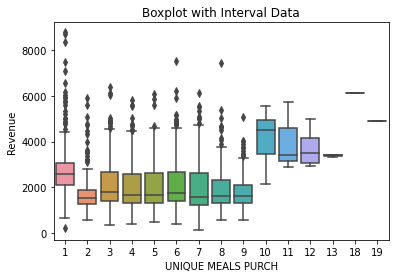

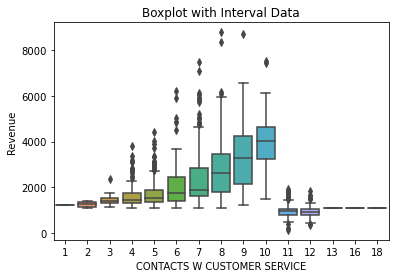

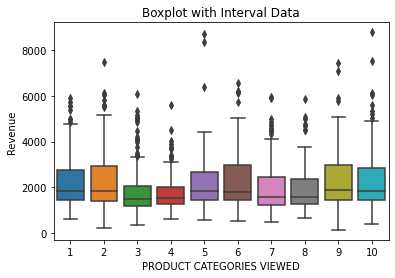

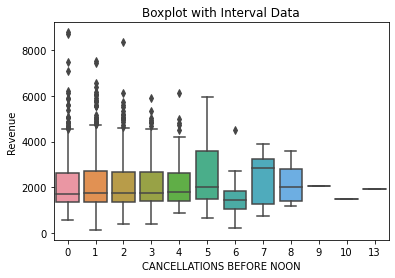

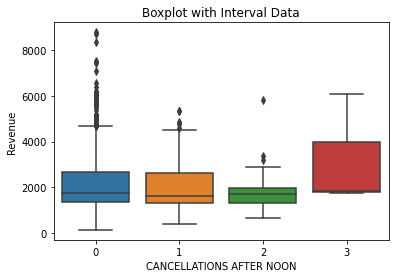

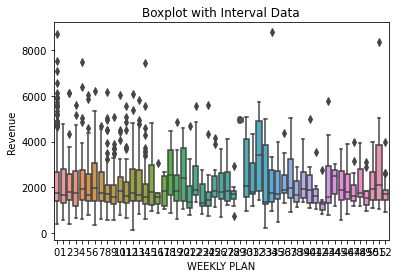

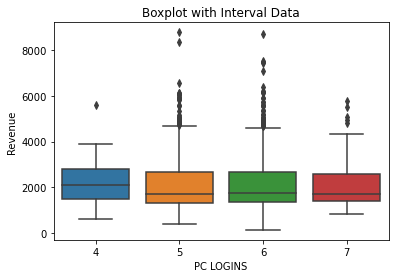

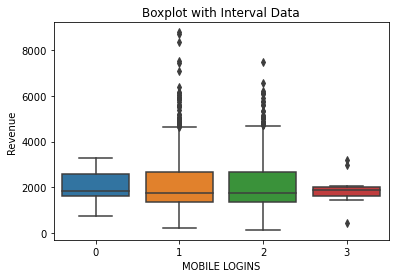

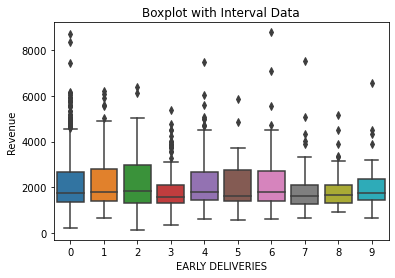

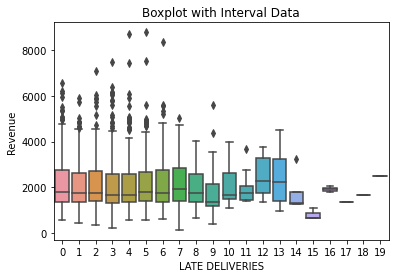

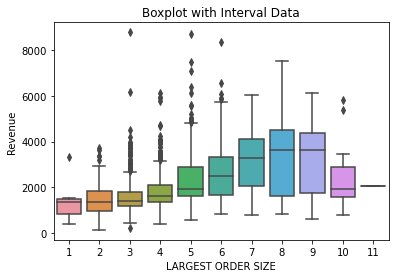

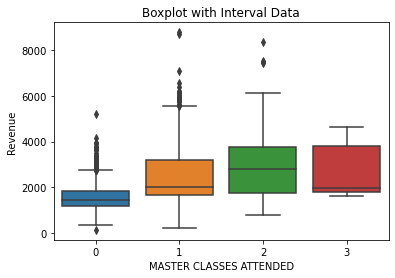

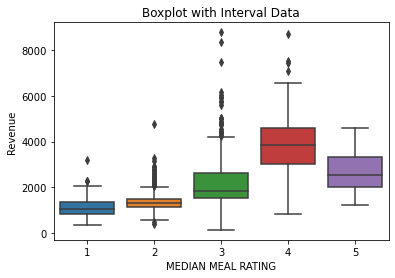

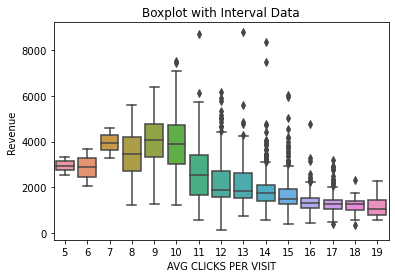

In [17]:
#1. developing a boxplot
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE MEALS PURCH')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

####################################

#2.  developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS W CUSTOMER SERVICE')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

####################################

#3.  developing a boxplot
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT CATEGORIES VIEWED')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

####################################

#4.  developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS BEFORE NOON')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

####################################

#5.  developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS AFTER NOON')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

####################################

#6.  developing a boxplot
sns.boxplot(x    = 'WEEKLY_PLAN',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'WEEKLY PLAN')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

####################################

#7.  developing a boxplot
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC LOGINS')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

####################################

#8.  developing a boxplot
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE LOGINS')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


####################################

#9.  developing a boxplot
sns.boxplot(x    = 'EARLY_DELIVERIES',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'EARLY DELIVERIES')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


####################################

#10.  developing a boxplot
sns.boxplot(x    = 'LATE_DELIVERIES',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LATE DELIVERIES')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


####################################

#11.  developing a boxplot
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LARGEST ORDER SIZE')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


####################################

#12.  developing a boxplot
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MASTER CLASSES ATTENDED')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


####################################

#13.  developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN MEAL RATING')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


####################################

#14.  developing a boxplot
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
            y    = 'REVENUE',
            data = Apprentice_Chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AVG CLICKS PER VISIT')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


####################################



# displaying the plot
plt.show()



With the boxplots it is easier to see the outliers and this way the threshold was created for each variable. 
There is also a way to see if a variable has a big amount of zeros, which was the case for the variables of CANCELLATIONS_BEFORE_NOON, CANCELLATIONS_AFTER_NOON, EARLY_DELIVERIES, LATE_DELIVERIES and MASTER_CLASSES_ATTENDED.

In [18]:
# counting the number of outliers of the interval variables
#setting a threshold using the std deviation and the boxplots seen previously
uniquemeals_zeroes   = len(Apprentice_Chef['UNIQUE_MEALS_PURCH'][Apprentice_Chef['UNIQUE_MEALS_PURCH'] > 10])
customerservice_zeroes  = len(Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE'][Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE'] > 7])
productsviewed_zeroes      = len(Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED'][Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED'] > 9])
cancellationsbefore_zeroes = len(Apprentice_Chef['CANCELLATIONS_BEFORE_NOON'][Apprentice_Chef['CANCELLATIONS_BEFORE_NOON'] == 0])
cancellationsafter_zeroes = len(Apprentice_Chef['CANCELLATIONS_AFTER_NOON'][Apprentice_Chef['CANCELLATIONS_AFTER_NOON'] == 0])
mobilelogins_zeroes = len(Apprentice_Chef['MOBILE_LOGINS'][Apprentice_Chef['MOBILE_LOGINS'] > 1])
pclogins_zeroes = len(Apprentice_Chef['PC_LOGINS'][Apprentice_Chef['PC_LOGINS'] > 1])
weeklyplan_zeroes = len(Apprentice_Chef['WEEKLY_PLAN'][Apprentice_Chef['WEEKLY_PLAN'] > 41])
earlydelivery_zeroes = len(Apprentice_Chef['EARLY_DELIVERIES'][Apprentice_Chef['EARLY_DELIVERIES'] == 0])
latedelivery_zeroes = len(Apprentice_Chef['LATE_DELIVERIES'][Apprentice_Chef['LATE_DELIVERIES'] == 0])
largestorder_zeroes = len(Apprentice_Chef['LARGEST_ORDER_SIZE'][Apprentice_Chef['LARGEST_ORDER_SIZE'] > 5])
medianmealrating_zeroes = len(Apprentice_Chef['MEDIAN_MEAL_RATING'][Apprentice_Chef['MEDIAN_MEAL_RATING'] >2 ])
clickspervisit_zeroes = len(Apprentice_Chef['AVG_CLICKS_PER_VISIT'][Apprentice_Chef['AVG_CLICKS_PER_VISIT'] >7 ])
classattended_zeroes = len(Apprentice_Chef['MASTER_CLASSES_ATTENDED'][Apprentice_Chef['MASTER_CLASSES_ATTENDED'] == 0])

## the table below has been coded for you ##

# printing a table of the results
print(f"""
                                 No\t\tYes
                            ---------------------
Unique Meals Purchased         | {uniquemeals_zeroes}\t\t{len(Apprentice_Chef) - uniquemeals_zeroes}
Contact with Customer Service  | {customerservice_zeroes}\t\t{len(Apprentice_Chef) - customerservice_zeroes}
Products Viewed                | {productsviewed_zeroes}\t\t{len(Apprentice_Chef) - productsviewed_zeroes}
Cancellations before noon      | {cancellationsbefore_zeroes}\t\t{len(Apprentice_Chef) - cancellationsbefore_zeroes}
Cancellations after noon       | {cancellationsafter_zeroes}\t\t{len(Apprentice_Chef) - cancellationsafter_zeroes}
Mobile Logins                  | {mobilelogins_zeroes}\t\t{len(Apprentice_Chef) - mobilelogins_zeroes}
PC Logins                      | {pclogins_zeroes}\t\t{len(Apprentice_Chef) - pclogins_zeroes}
Weekly Plan                    | {weeklyplan_zeroes}\t\t{len(Apprentice_Chef) - weeklyplan_zeroes}
Early Deliveries               | {earlydelivery_zeroes}\t\t{len(Apprentice_Chef) - earlydelivery_zeroes}
Late Deliveries                | {latedelivery_zeroes}\t\t{len(Apprentice_Chef) - latedelivery_zeroes}
Largest Order Size             | {largestorder_zeroes}\t\t{len(Apprentice_Chef) - largestorder_zeroes}
Median Meal Rating             | {medianmealrating_zeroes}\t\t{len(Apprentice_Chef) - medianmealrating_zeroes}
Average Clicks per Visit       | {clickspervisit_zeroes}\t\t{len(Apprentice_Chef) - clickspervisit_zeroes}
Master Class Attended          | {classattended_zeroes}\t\t{len(Apprentice_Chef) - classattended_zeroes}
""")


                                 No		Yes
                            ---------------------
Unique Meals Purchased         | 12		1934
Contact with Customer Service  | 678		1268
Products Viewed                | 287		1659
Cancellations before noon      | 667		1279
Cancellations after noon       | 1667		279
Mobile Logins                  | 931		1015
PC Logins                      | 1946		0
Weekly Plan                    | 131		1815
Early Deliveries               | 1167		779
Late Deliveries                | 319		1627
Largest Order Size             | 407		1539
Median Meal Rating             | 1360		586
Average Clicks per Visit       | 1940		6
Master Class Attended          | 932		1014



The same as was done before, only the variables that have at least 100 observations in each 'No' and 'Yes' will be taken into consideration.
In this case Unique Meals Purchased, PC logins and Average Clicks per Visit won't be needing a dummy variable.

In [19]:
#Creating dummy variables for those interval variables that have at least 100 observations in both columns

# dummy variables for interval variables
Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE_range'] = 0
Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED_range']   = 0
Apprentice_Chef['CANCELLATIONS_BEFORE_NOON_range']   = 0
Apprentice_Chef['CANCELLATIONS_AFTER_NOON_range']    = 0
Apprentice_Chef['MOBILE_LOGINS_range']               = 0
Apprentice_Chef['WEEKLY_PLAN_range']                 = 0
Apprentice_Chef['EARLY_DELIVERIES_range']            = 0
Apprentice_Chef['LATE_DELIVERIES_range']             = 0
Apprentice_Chef['LARGEST_ORDER_SIZE_range']          = 0
Apprentice_Chef['MEDIAN_MEAL_RATING_range']          = 0
Apprentice_Chef['MASTER_CLASSES_ATTENDED_range']     = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in Apprentice_Chef.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if Apprentice_Chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE"] > 0:
        Apprentice_Chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE_range'] = 1
        
        
    # PRODUCT_CATEGORIES_VIEWED
    if Apprentice_Chef.loc[index, "PRODUCT_CATEGORIES_VIEWED"] > 0:
        Apprentice_Chef.loc[index, 'PRODUCT_CATEGORIES_VIEWED_range'] = 1

    # CANCELLATIONS_BEFORE_NOON
    if Apprentice_Chef.loc[index, "CANCELLATIONS_BEFORE_NOON"] > 0:
        Apprentice_Chef.loc[index, 'CANCELLATIONS_BEFORE_NOON_range'] = 1
        
    # CANCELLATIONS_AFTER_NOON
    if Apprentice_Chef.loc[index, "CANCELLATIONS_AFTER_NOON"] > 0:
        Apprentice_Chef.loc[index, 'CANCELLATIONS_AFTER_NOON_range'] = 1
        
    # MOBILE_LOGINS
    if Apprentice_Chef.loc[index, "MOBILE_LOGINS"] > 0:
        Apprentice_Chef.loc[index, 'MOBILE_LOGINS_range'] = 1
               
    # WEEKLY_PLAN
    if Apprentice_Chef.loc[index, "WEEKLY_PLAN"] > 0:
        Apprentice_Chef.loc[index, 'WEEKLY_PLAN_range'] = 1
        
    # EARLY_DELIVERIES
    if Apprentice_Chef.loc[index, "EARLY_DELIVERIES"] > 0:
        Apprentice_Chef.loc[index, 'EARLY_DELIVERIES_range'] = 1
        
    # LATE_DELIVERIES
    if Apprentice_Chef.loc[index, "LATE_DELIVERIES"] > 0:
        Apprentice_Chef.loc[index, 'LATE_DELIVERIES_range'] = 1
        
    # LARGEST_ORDER_SIZE
    if Apprentice_Chef.loc[index, "LARGEST_ORDER_SIZE"] > 0:
        Apprentice_Chef.loc[index, 'LARGEST_ORDER_SIZE_range'] = 1

    # MEDIAN_MEAL_RATING
    if Apprentice_Chef.loc[index, "MEDIAN_MEAL_RATING"] > 0:
        Apprentice_Chef.loc[index, 'MEDIAN_MEAL_RATING_range'] = 1
        
    # MASTER_CLASSES_ATTENDED
    if Apprentice_Chef.loc[index, "MASTER_CLASSES_ATTENDED"] > 0:
        Apprentice_Chef.loc[index, 'MASTER_CLASSES_ATTENDED_range'] = 1


In [20]:
#Checking results
#Apprentice_Chef[['CONTACTS_W_CUSTOMER_SERVICE_range', 'PRODUCT_CATEGORIES_VIEWED_range', 'CANCELLATIONS_BEFORE_NOON_range', 'CANCELLATIONS_AFTER_NOON_range', 'MOBILE_LOGINS_range', 'WEEKLY_PLAN_range', 'EARLY_DELIVERIES_range', 'LATE_DELIVERIES_range', 'LARGEST_ORDER_SIZE_range', 'MEDIAN_MEAL_RATING_range', 'MASTER_CLASSES_ATTENDED_range']].head()

<h2> 4.1 Creating logarithmic variables </h2><br>

A further analysis was made with the interval variables to see if by transforming each variable with Log10 a bigger correlation would result.

The next tables show the results.

Some variables had to be ignored because they could not be transformed.

In [21]:
#Correlation between a normal variable and a log variable
#Unique Meals Purchased
Apprentice_Chef['log_UNIQUE_MEALS_PURCH'] = np.log10(Apprentice_Chef['UNIQUE_MEALS_PURCH'])


log_corr = Apprentice_Chef.loc[ : , ['UNIQUE_MEALS_PURCH'  ,
                                     'log_UNIQUE_MEALS_PURCH',
                                     'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson')\
                                                      .round(decimals = 2)



log_corr.loc[ ['UNIQUE_MEALS_PURCH', 'log_UNIQUE_MEALS_PURCH'],
              ['REVENUE', 'log_REVENUE']   ]






,REVENUE,log_REVENUE
UNIQUE_MEALS_PURCH,-0.06,-0.08
log_UNIQUE_MEALS_PURCH,-0.12,-0.13


In [22]:
#Contact with Customer Service
Apprentice_Chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(Apprentice_Chef['CONTACTS_W_CUSTOMER_SERVICE'])


log_corr = Apprentice_Chef.loc[ : , ['CONTACTS_W_CUSTOMER_SERVICE'  ,
                                     'log_CONTACTS_W_CUSTOMER_SERVICE',
                                     'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson')\
                                                      .round(decimals = 2)



log_corr.loc[ ['CONTACTS_W_CUSTOMER_SERVICE', 'log_CONTACTS_W_CUSTOMER_SERVICE'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
log_CONTACTS_W_CUSTOMER_SERVICE,0.17,0.05


In [23]:
#Product Categories Viewed
Apprentice_Chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(Apprentice_Chef['PRODUCT_CATEGORIES_VIEWED'])


log_corr = Apprentice_Chef.loc[ : , ['PRODUCT_CATEGORIES_VIEWED'  ,
                                     'log_PRODUCT_CATEGORIES_VIEWED',
                                     'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson')\
                                                      .round(decimals = 2)



log_corr.loc[ ['PRODUCT_CATEGORIES_VIEWED', 'log_PRODUCT_CATEGORIES_VIEWED'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
PRODUCT_CATEGORIES_VIEWED,0.03,0.04
log_PRODUCT_CATEGORIES_VIEWED,0.01,0.01


In [24]:
#PC Logins
Apprentice_Chef['log_PC_LOGINS'] = np.log10(Apprentice_Chef['PC_LOGINS'])


log_corr = Apprentice_Chef.loc[ : , ['PC_LOGINS'  ,
                                     'log_PC_LOGINS',
                                     'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson')\
                                                      .round(decimals = 2)



log_corr.loc[ ['PC_LOGINS', 'log_PC_LOGINS'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
PC_LOGINS,0.02,0.01
log_PC_LOGINS,0.01,0.01


In [25]:
#Largest order size
Apprentice_Chef['log_LARGEST_ORDER_SIZE'] = np.log10(Apprentice_Chef['LARGEST_ORDER_SIZE'])


log_corr = Apprentice_Chef.loc[ : , ['LARGEST_ORDER_SIZE'  ,
                                     'log_LARGEST_ORDER_SIZE',
                                     'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson')\
                                                      .round(decimals = 2)



log_corr.loc[ ['LARGEST_ORDER_SIZE', 'log_LARGEST_ORDER_SIZE'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
LARGEST_ORDER_SIZE,0.44,0.45
log_LARGEST_ORDER_SIZE,0.42,0.45


In [26]:
#Median Meal Rating
Apprentice_Chef['log_MEDIAN_MEAL_RATING'] = np.log10(Apprentice_Chef['MEDIAN_MEAL_RATING'])


log_corr = Apprentice_Chef.loc[ : , ['MEDIAN_MEAL_RATING'  ,
                                     'log_MEDIAN_MEAL_RATING',
                                     'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson')\
                                                      .round(decimals = 2)



log_corr.loc[ ['MEDIAN_MEAL_RATING', 'log_MEDIAN_MEAL_RATING'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.55,0.61


In [27]:
#
Apprentice_Chef['log_AVG_CLICKS_PER_VISIT'] = np.log10(Apprentice_Chef['AVG_CLICKS_PER_VISIT'])


log_corr = Apprentice_Chef.loc[ : , ['AVG_CLICKS_PER_VISIT'  ,
                                     'log_AVG_CLICKS_PER_VISIT',
                                     'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson')\
                                                      .round(decimals = 2)



log_corr.loc[ ['AVG_CLICKS_PER_VISIT', 'log_AVG_CLICKS_PER_VISIT'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
AVG_CLICKS_PER_VISIT,-0.55,-0.58
log_AVG_CLICKS_PER_VISIT,-0.56,-0.58


Some correlations increased with the Log10 transformation. So we will analyze a variable by creating a boxplot and see if the data follows a straight line.

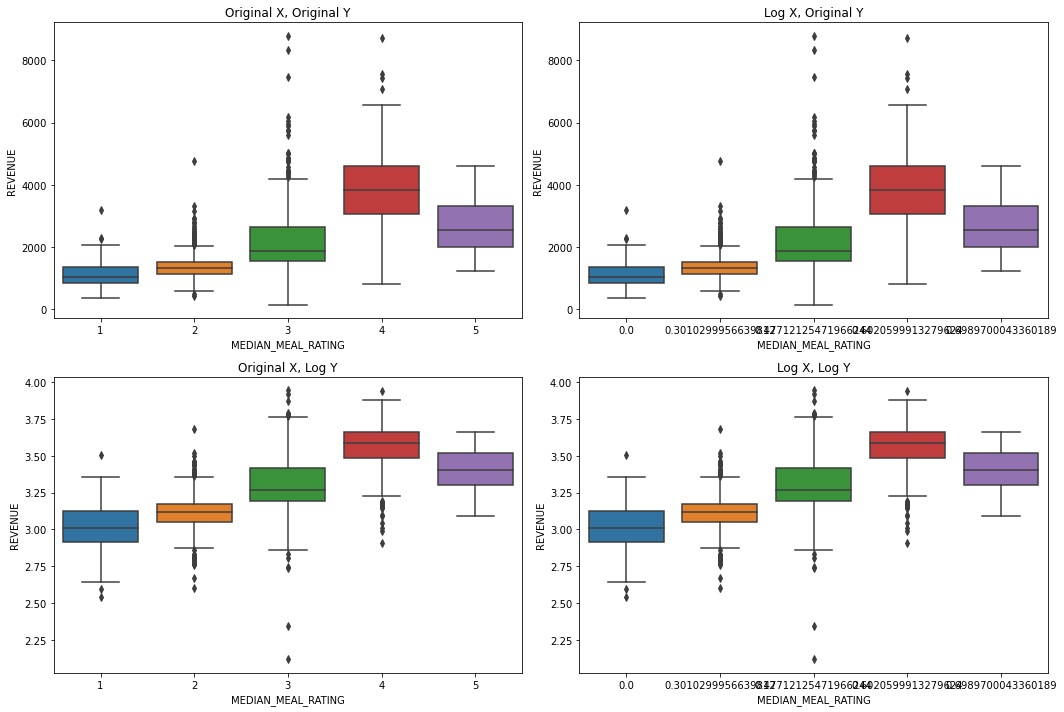

In [28]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'MEDIAN_MEAL_RATING',
            y     = 'REVENUE',
            data  = Apprentice_Chef)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_MEDIAN_MEAL_RATING',
            y     = 'REVENUE',
            data  = Apprentice_Chef)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'MEDIAN_MEAL_RATING',
            y     = 'log_REVENUE',
            data  = Apprentice_Chef)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


## Plot 4: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = np.log10(Apprentice_Chef['MEDIAN_MEAL_RATING']),
            y     = np.log10(Apprentice_Chef['REVENUE']),
            data  = Apprentice_Chef)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()

By transforming both the predictive variable and the response variable, the data seems to fit more to a straight line.

<h2>5. Categorical Data</h2><br>

The emails will be split into personal, professional and junk emails, this will allow us understand what type of customers are generating more revenue.

In [29]:
# guessing gender based on (given) name

import gender_guesser.detector as gender

# placeholder list
placeholder_lst = []


# looping to guess gender
for name in Apprentice_Chef['FIRST_NAME']:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst.append(guess)


# converting list into a series
Apprentice_Chef['gender_guess'] = pd.Series(placeholder_lst)

unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
female
male
unknown
male
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
unknown
male
male
unknown
male
unknown
male
unknown
unknown
unknown
male
male
unknown
unknown
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
male
unknown
unknown
mostly_male
female
unknown
male
male
unknown
male
unknown
unknown
unknown
male
unknown
unknown
male
unknown
unknown
unknown
unknown
mostly_male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
unknown
male
unknown
unknown
male
male
male
female
unknown
unknown
male
unknown
unknown
unknown
female
unknown
male
unknown
male
unknown
female
male
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
female
male
female
female
unknown
male
unknown
male
unknown
male
unknown
unknown
unknown
unknow

unknown
male
male
unknown
unknown
unknown
andy
unknown
female
male
unknown
unknown
unknown
male
unknown
unknown
unknown
male
male
male
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
female
unknown
unknown
male
unknown
male
unknown
unknown
unknown
mostly_male
male
male
male
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
male
male
male
male
unknown
unknown
unknown
female
unknown
unknown
male
unknown
male
unknown
unknown
unknown
mostly_male
male
unknown
male
unknown
unknown
female
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
male
male
unknown
male
male
male
male
unknown
unknown
unknown
female
male
male
unknown
male
unknown
mostly_female
male
unknown
unknown
female
male
unknown

In [30]:
# concatenating with original DataFrame
Apprentice_Chef['domain_group'] = pd.Series(placeholder_lst)

# checking results
Apprentice_Chef['domain_group'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: domain_group, dtype: int64

In [31]:
#Creating dummies for Emails
dummy_Email      = pd.get_dummies(Apprentice_Chef['domain_group'])

#Dropping EMAIL and domain_group from apprentice_chef
Apprentice_Chef        = Apprentice_Chef.drop('gender_guess', axis = 1)
Apprentice_Chef        = Apprentice_Chef.drop('domain_group', axis = 1)

#Joining the dummies to apprentice_chef
Apprentice_Chef       = Apprentice_Chef.join([dummy_Email])


# saving new columns
new_columns = Apprentice_Chef.columns

In [32]:
#Combining the columns to create a new one joining all the potential males
Apprentice_Chef["potential_male"] = Apprentice_Chef["male"] + Apprentice_Chef["mostly_male"] + Apprentice_Chef["andy"] 

#Combining the columns to create a new one joining all the potential females
Apprentice_Chef["potential_female"] = Apprentice_Chef["female"] + Apprentice_Chef["mostly_female"]

#Dropping andy, female, male, mostly_female, mostly_male
Apprentice_Chef = Apprentice_Chef.drop(['andy', 'female', 'male', 'mostly_female', 'mostly_male'], axis = 1)

In [33]:
#Working with Categorical Data
#Splitting Emails

# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in Apprentice_Chef.iterrows():
    
    # splitting email domain at '@'
    split_email = Apprentice_Chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [34]:
#Setting Personal, Professional and Junk Emails
personal_email_domains      = ['@gmail.com',
                               '@yahoo.com',
                               '@protonmail.com']

professional_email_domains  = ['@mmm.com',
                               '@amex.com',
                               '@apple.com',
                               '@boeing.com',
                               '@caterpillar.com',
                               '@chevron.com',
                               '@cisco.com',
                               '@cocacola.com',
                               '@disney.com',
                               '@dupont.com',
                               '@exxon.com',
                               '@ge.org',
                               '@goldmansacs.com',
                               '@homedepot.com',
                               '@ibm.com',
                               '@intel.com',
                               '@jnj.com',
                               '@jpmorgan.com',
                               '@mcdonalds.com',
                               '@merck.com',
                               '@microsoft.com',
                               '@nike.com',
                               '@pfizer.com',
                               '@pg.com',
                               '@travelers.com',
                               '@unitedtech.com',
                               '@unitedhealth.com',
                               '@verizon.com',
                               '@visa.com',
                               '@walmart.com']

junk_email_domains          = ['@me.com',
                               '@aol.com',
                               '@hotmail.com',
                               '@live.com',
                               '@msn.com',
                               '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df[1]:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
           
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
Apprentice_Chef['domain_group'] = pd.Series(placeholder_lst)

# checking results
Apprentice_Chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [35]:
#Creating dummies for Emails
dummy_Email      = pd.get_dummies(Apprentice_Chef['domain_group'])

#Dropping EMAIL and domain_group from apprentice_chef
Apprentice_Chef        = Apprentice_Chef.drop('EMAIL', axis = 1)
Apprentice_Chef        = Apprentice_Chef.drop('domain_group', axis = 1)

#Joining the dummies to apprentice_chef
Apprentice_Chef       = Apprentice_Chef.join([dummy_Email])


# saving new columns
new_columns = Apprentice_Chef.columns

<h2>6. New Variables</h2><br>

In order to analyze more specifically the whole amount of Revenue, there is a need to add the Revenue generated from the Beverages. 
Firstly we need to calculate the average spent by customer and then create another dummy variables with the minimum that a customer could spend which is 7 and the maximum which is 25.

In [36]:
# Creating 2 new variables that should help analyzing  
# Interest: Does buying beverages increase Apprentice Chef revenues?

# Creating a dummy variable
Apprentice_Chef['DISCOUNT'] = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in Apprentice_Chef.iterrows():
    
    # beverage
    if Apprentice_Chef.loc[index, 'TOTAL_MEALS_ORDERED'] <= 3:  
        Apprentice_Chef.loc[index, 'DISCOUNT'] = 10
        
    else :
        Apprentice_Chef.loc[index, 'DISCOUNT'] = 20

In [37]:
Apprentice_Chef['SUBSCRIPTION'] = 0

for index, value in Apprentice_Chef.iterrows():
    
    if Apprentice_Chef.loc[index, 'WEEKLY_PLAN'] == 0:
        Apprentice_Chef.loc[index, 'SUBSCRIPTION'] = 0
        
    else :
        Apprentice_Chef.loc[index, 'SUBSCRIPTION'] = 1

In [84]:
Apprentice_Chef['PREPVID_VS_AVGMEALS'] = 0

for index, value in Apprentice_Chef.iterrows():
    
    if Apprentice_Chef.loc[index, 'AVG_PREP_VID_TIME'] >=150 and Apprentice_Chef.loc[index, 'LARGEST_ORDER_SIZE']>=5:
        Apprentice_Chef.loc[index, 'PREPVID_VS_AVGMEALS'] = 1
        
    else:
        Apprentice_Chef.loc[index, 'PREPVID_VS_AVGMEALS'] = 0  
        

In [104]:
#Creation of a new variable that can allow us to understand how many orders does a customer buy per unique order
Apprentice_Chef['AVG_UNIQUE_ORDERS'] = Apprentice_Chef['TOTAL_MEALS_ORDERED'] / Apprentice_Chef['UNIQUE_MEALS_PURCH']

#Log of the new variable
Apprentice_Chef['log_AVG_UNIQUE_ORDERS'] = np.log10(Apprentice_Chef['AVG_UNIQUE_ORDERS'])



In [144]:
Apprentice_Chef['LATE_OVER_TOTALMEALS'] = Apprentice_Chef['LATE_DELIVERIES'] / Apprentice_Chef['TOTAL_MEALS_ORDERED']


In [159]:
Apprentice_Chef['EARLY_OVER_TOTALMEALS'] = Apprentice_Chef['EARLY_DELIVERIES'] / Apprentice_Chef['TOTAL_MEALS_ORDERED']

In [173]:
#df.WEEKLY_PLAN.describe() # Count of weeks that a customer subscribed 

# It seems that users are not using the weekly meal plans! 
# df[df.WEEKLY_PLAN == 52]
#df.TOTAL_MEALS_ORDERED.describe()

# It looks that there's no effective cross sell success for people that order a lot of meals
Apprentice_Chef.loc[Apprentice_Chef.UNIQUE_MEALS_PURCH < 10, ['UNIQUE_MEALS_PURCH',
                                      'NAME',
                                      'TOTAL_MEALS_ORDERED',
                                     'REVENUE']].sort_values('UNIQUE_MEALS_PURCH',ascending = False).groupby('REVENUE').mean()

,UNIQUE_MEALS_PURCH,TOTAL_MEALS_ORDERED
REVENUE,,
131.000,7.0,13.0
222.250,1.0,12.0
349.000,3.0,15.0
393.000,6.0,14.0
400.000,4.0,15.0
...,...,...
7473.375,1.0,91.0
7550.000,6.0,303.0
8347.500,1.0,82.0


Text(0, 0.5, 'Revenue')

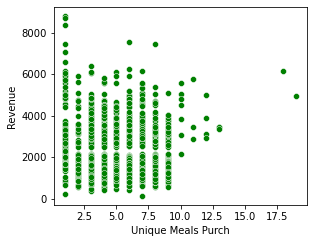

In [175]:
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Chef['UNIQUE_MEALS_PURCH'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purch')
plt.ylabel(ylabel = 'Revenue')

In [179]:
Apprentice_Chef.UNIQUE_MEALS_PURCH.value_counts(ascending=False)

3     338
4     260
6     226
5     214
7     205
8     179
1     173
2     170
9     162
10      7
12      4
13      3
11      3
19      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64

In [188]:
# It looks that there's no effective cross sell success for people that order a lot of meals
Apprentice_Chef.loc[Apprentice_Chef.AVG_CLICKS_PER_VISIT ==19, ['AVG_CLICKS_PER_VISIT',
                                      'NAME',
                                      'TOTAL_MEALS_ORDERED',
                                     'REVENUE']].sort_values('AVG_CLICKS_PER_VISIT',ascending =True).groupby('REVENUE').mean()

,AVG_CLICKS_PER_VISIT,TOTAL_MEALS_ORDERED
REVENUE,,
550.0,19,15
610.0,19,15
639.0,19,13
799.0,19,15
810.0,19,13
850.0,19,13
1000.0,19,15
1080.0,19,12
1275.0,19,37


Text(0, 0.5, 'Revenue')

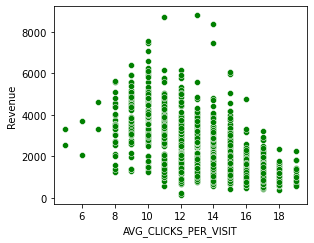

In [189]:
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Chef['AVG_CLICKS_PER_VISIT'],
                y = Apprentice_Chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'Revenue')

Checking Correlations

In [160]:
# creating a (Pearson) correlation matrix
df_corr = Apprentice_Chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                              1.00
log_REVENUE                          0.95
AVG_PREP_VID_TIME                    0.64
MEDIAN_MEAL_RATING                   0.61
TOTAL_MEALS_ORDERED                  0.60
log_AVG_UNIQUE_ORDERS                0.57
log_MEDIAN_MEAL_RATING               0.55
AVG_UNIQUE_ORDERS                    0.55
TOTAL_PHOTOS_VIEWED                  0.47
PREPVID_VS_AVGMEALS                  0.46
MASTER_CLASSES_ATTENDED              0.45
MASTER_CLASSES_ATTENDED_range        0.45
LARGEST_ORDER_SIZE                   0.44
log_LARGEST_ORDER_SIZE               0.42
log_CONTACTS_W_CUSTOMER_SERVICE      0.17
AVG_TIME_PER_SITE_VISIT              0.14
CONTACTS_W_CUSTOMER_SERVICE          0.10
potential_male                       0.04
PRODUCT_CATEGORIES_VIEWED            0.03
MOBILE_NUMBER                        0.03
PC_LOGINS                            0.02
CANCELLATIONS_BEFORE_NOON_range      0.02
professional                         0.01
log_PC_LOGINS                     

In [161]:
# making a copy of housing
Apprentice_Chef_explanatory = Apprentice_Chef.copy()


# dropping SalePrice and Order from the explanatory variable set
Apprentice_Chef_explanatory = Apprentice_Chef_explanatory.drop(['REVENUE',
                                 'log_REVENUE', 'NAME', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in Apprentice_Chef_explanatory:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
m_FAMILY_NAME +
TOTAL_MEALS_ORDERED_range +
AVG_PREP_VID_TIME_range +
CONTACTS_W_CUSTOMER_SERVICE_range +
PRODUCT_CATEGORIES_VIEWED_range +
CANCELLATIONS_BEFORE_NOON_range +
CANCELLATIONS_AFTER_NOON_range +
MOBILE_LOGINS_range +
WEEKLY_PLAN_range +
EARLY_DELIVERIES_range +
LATE_DELIVERIES_range +
LARGEST_ORDER_SIZE_range +
MEDIAN_MEAL_RATING_range +
MASTER_CLASSES_ATTENDED_range +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_PC_LOGINS +
log_LARGEST_OR

<h2>7. Building a Full Model</h2><br>

We take every variable created and modified and we put it in this first model.

In [162]:
# Building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """REVENUE ~CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
m_FAMILY_NAME +
TOTAL_MEALS_ORDERED_range +
AVG_PREP_VID_TIME_range +
CONTACTS_W_CUSTOMER_SERVICE_range +
PRODUCT_CATEGORIES_VIEWED_range +
CANCELLATIONS_BEFORE_NOON_range +
CANCELLATIONS_AFTER_NOON_range +
MOBILE_LOGINS_range +
WEEKLY_PLAN_range +
EARLY_DELIVERIES_range +
LATE_DELIVERIES_range +
LARGEST_ORDER_SIZE_range +
MEDIAN_MEAL_RATING_range +
MASTER_CLASSES_ATTENDED_range +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_PC_LOGINS +
log_LARGEST_ORDER_SIZE +
log_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
junk +
personal +
professional +
DISCOUNT +
SUBSCRIPTION +
unknown +
potential_male +
potential_female +
PREPVID_VS_AVGMEALS +
AVG_UNIQUE_ORDERS +
log_AVG_UNIQUE_ORDERS +
LATE_OVER_TOTALMEALS +
EARLY_OVER_TOTALMEALS""",
                                        data = Apprentice_Chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:00:17   Log-Likelihood:                -15163.
No. Observations:                1946   AIC:                         3.043e+04
Df Residuals:                    1896   BIC:                         3.070e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.4974      4.293     -0.116      0.908      -8.916       7.922
CROSS_SELL_SUCCESS                  -88.3841     31.767     -2.782      0.005    -150.686     -26.082
TOTAL_MEALS_ORDERED                  -4.8824      1.008     -4.845      0.000      -6.859      -2.906
UNIQUE_MEALS_PURCH                  237.8393     17.722     13.421      0.000     203.083     272.596
CONTACTS_W_CUSTOMER_SERVICE         139.9966     34.081      4.108      0.000      73.156     206.837
PRODUCT_CATEGORIES_VIEWED            54.6434     15.494      3.527      0.000      24.256      85.031
AVG_TIME_PER_SITE_VISIT               0.2440      0.235      1.037      0.300      -0.217       0.706
MOBILE_NUMBER                        28.2828     41.916      0.675      0.500     -53.923     110.488
CANCELLATIONS_BEFORE_NOON            -3.9918     11.689     -0.341      0.733     -26.917      18.933
CANCELLATIONS_AFTER_NOON             84.0278     91.630      0.917      0.359     -95.678     263.733
TASTES_AND_PREFERENCES               28.9091     30.288      0.954      0.340     -30.491      88.310
PC_LOGINS                            55.8001    352.764      0.158      0.874    -636.045     747.646
MOBILE_LOGINS                       -60.4279     26.762     -2.258      0.024    -112.914      -7.942
WEEKLY_PLAN                           1.1730      1.138      1.031      0.303      -1.059       3.405
EARLY_DELIVERIES                      2.4448     11.698      0.209      0.834     -20.498      25.388
LATE_DELIVERIES                      12.3115      7.979      1.543      0.123      -3.337      27.960
PACKAGE_LOCKER                      -27.0141     32.405     -0.834      0.405     -90.567      36.539
REFRIGERATED_LOCKER                 -18.6542     49.131     -0.380      0.704    -115.010      77.701
AVG_PREP_VID_TIME                     7.9959      0.628     12.738      0.000       6.765       9.227
LARGEST_ORDER_SIZE                 -139.6810     37.837     -3.692      0.000    -213.887     -65.475
MASTER_CLASSES_ATTENDED              85.4273     51.292      1.666      0.096     -15.167     186.022
MEDIAN_MEAL_RATING                  955.4901    114.022      8.380      0.000     731.868    1179.112
AVG_CLICKS_PER_VISIT                101.5160     51.296      1.979      0.048       0.913     202.119
TOTAL_PHOTOS_VIEWED                   0.6879      0.086      7.991      0.000       0.519       0.857
m_FAMILY_NAME                       -74.1733     88.541     -0.838      0.402    -247.822      99.476
TOTAL_MEALS_ORDERED_range          -325.3244     93.898     -3.465      0.001    -509.478    -141.171
AVG_PREP_VID_TIME_range             -58.4361     51.141     -1.143      0.253    -158.735      41.862
CONTACTS_W_CUSTOMER_SER

The results were pretty good in terms of R-Squared but we also need to check the P-values of the variables and we see that many of them have a P-value bigger than 0.05, so the next step is to eliminate those variables to see how our model changes.

We also check the same model but now using log_REVENUE to see if the model is better or worse.

In [163]:
# Building a full model using log_REVENUE

# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
m_FAMILY_NAME +
TOTAL_MEALS_ORDERED_range +
AVG_PREP_VID_TIME_range +
CONTACTS_W_CUSTOMER_SERVICE_range +
PRODUCT_CATEGORIES_VIEWED_range +
CANCELLATIONS_BEFORE_NOON_range +
CANCELLATIONS_AFTER_NOON_range +
MOBILE_LOGINS_range +
WEEKLY_PLAN_range +
EARLY_DELIVERIES_range +
LATE_DELIVERIES_range +
LARGEST_ORDER_SIZE_range +
MEDIAN_MEAL_RATING_range +
MASTER_CLASSES_ATTENDED_range +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_PC_LOGINS +
log_LARGEST_ORDER_SIZE +
log_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
junk +
personal +
professional +
DISCOUNT +
SUBSCRIPTION +
unknown +
potential_male +
potential_female +
AVG_UNIQUE_ORDERS +
log_AVG_UNIQUE_ORDERS +
LATE_OVER_TOTALMEALS +
EARLY_OVER_TOTALMEALS""",
                                        data = Apprentice_Chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:00:34   Log-Likelihood:                 1743.4
No. Observations:                1946   AIC:                            -3389.
Df Residuals:                    1897   BIC:                            -3116.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.0063      0.001      8.718      0.000       0.005       0.008
CROSS_SELL_SUCCESS                   -0.0166      0.005     -3.090      0.002      -0.027      -0.006
TOTAL_MEALS_ORDERED                  -0.0015      0.000     -8.558      0.000      -0.002      -0.001
UNIQUE_MEALS_PURCH                    0.0503      0.003     16.849      0.000       0.044       0.056
CONTACTS_W_CUSTOMER_SERVICE           0.0044      0.006      0.758      0.448      -0.007       0.016
PRODUCT_CATEGORIES_VIEWED             0.0097      0.003      3.708      0.000       0.005       0.015
AVG_TIME_PER_SITE_VISIT            3.189e-05   3.97e-05      0.804      0.422   -4.59e-05       0.000
MOBILE_NUMBER                         0.0067      0.007      0.944      0.345      -0.007       0.021
CANCELLATIONS_BEFORE_NOON            -0.0002      0.002     -0.091      0.928      -0.004       0.004
CANCELLATIONS_AFTER_NOON              0.0113      0.015      0.731      0.465      -0.019       0.042
TASTES_AND_PREFERENCES                0.0071      0.005      1.383      0.167      -0.003       0.017
PC_LOGINS                             0.0210      0.059      0.353      0.724      -0.096       0.138
MOBILE_LOGINS                        -0.0077      0.005     -1.711      0.087      -0.017       0.001
WEEKLY_PLAN                           0.0002      0.000      0.927      0.354      -0.000       0.001
EARLY_DELIVERIES                      0.0004      0.002      0.211      0.833      -0.003       0.004
LATE_DELIVERIES                       0.0027      0.001      2.037      0.042       0.000       0.005
PACKAGE_LOCKER                       -0.0075      0.005     -1.368      0.171      -0.018       0.003
REFRIGERATED_LOCKER                  -0.0073      0.008     -0.880      0.379      -0.024       0.009
AVG_PREP_VID_TIME                     0.0013      0.000     12.703      0.000       0.001       0.002
LARGEST_ORDER_SIZE                   -0.0365      0.006     -5.978      0.000      -0.048      -0.025
MASTER_CLASSES_ATTENDED               0.0079      0.009      0.909      0.364      -0.009       0.025
MEDIAN_MEAL_RATING                    0.1309      0.019      6.812      0.000       0.093       0.169
AVG_CLICKS_PER_VISIT                  0.0103      0.009      1.197      0.231      -0.007       0.027
TOTAL_PHOTOS_VIEWED                9.474e-05   1.45e-05      6.527      0.000    6.63e-05       0.000
m_FAMILY_NAME                        -0.0067      0.015     -0.448      0.654      -0.036       0.023
TOTAL_MEALS_ORDERED_range            -0.0769      0.016     -4.861      0.000      -0.108      -0.046
AVG_PREP_VID_TIME_range              -0.0215      0.007     -2.993      0.003      -0.036      -0.007
CONTACTS_W_CUSTOMER_SER

The R-Squared using log_REVENUE increased, so we are going to use log_REVENUE as the response variable.

Now we build a fit model by deleting the variables that have a P-value bigger than 0.05 and we do it by deleting one by one to see how the model changes.


<br><h2>7.1 Building a Fit Model</h2>


In [164]:
# Building a fit model using log_REVENUE

# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MEDIAN_MEAL_RATING +
TOTAL_MEALS_ORDERED_range +
LARGEST_ORDER_SIZE_range +
MEDIAN_MEAL_RATING_range +
MASTER_CLASSES_ATTENDED_range +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_LARGEST_ORDER_SIZE +
DISCOUNT +
log_AVG_UNIQUE_ORDERS +
LATE_OVER_TOTALMEALS +
EARLY_OVER_TOTALMEALS""",
                                        data = Apprentice_Chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     395.3
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:00:58   Log-Likelihood:                 1674.1
No. Observations:                1946   AIC:                            -3314.
Df Residuals:                    1929   BIC:                            -3220.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.0055      0.000     53.210      0.000       0.005       0.006
TOTAL_MEALS_ORDERED                -0.0013      0.000     -7.655      0.000      -0.002      -0.001
UNIQUE_MEALS_PURCH                  0.0513      0.003     17.584      0.000       0.046       0.057
CONTACTS_W_CUSTOMER_SERVICE         0.0093      0.006      1.616      0.106      -0.002       0.021
PRODUCT_CATEGORIES_VIEWED           0.0096      0.003      3.618      0.000       0.004       0.015
AVG_PREP_VID_TIME                   0.0016   9.28e-05     17.355      0.000       0.001       0.002
LARGEST_ORDER_SIZE                 -0.0349      0.006     -5.642      0.000      -0.047      -0.023
MEDIAN_MEAL_RATING                  0.0654      0.004     16.521      0.000       0.058       0.073
TOTAL_MEALS_ORDERED_range          -0.0762      0.016     -4.750      0.000      -0.108      -0.045
LARGEST_ORDER_SIZE_range            0.0055      0.000     53.210      0.000       0.005       0.006
MEDIAN_MEAL_RATING_range            0.0055      0.000     53.210      0.000       0.005       0.006
MASTER_CLASSES_ATTENDED_range       0.0367      0.005      6.703      0.000       0.026       0.047
log_UNIQUE_MEALS_PURCH             -0.1619      0.036     -4.555      0.000      -0.232      -0.092
log_CONTACTS_W_CUSTOMER_SERVICE     0.0742      0.084      0.889      0.374      -0.090       0.238
log_PRODUCT_CATEGORIES_VIEWED      -0.0865      0.026     -3.264      0.001      -0.138      -0.035
log_LARGEST_ORDER_SIZE              0.2107      0.055      3.827      0.000       0.103       0.319
DISCOUNT                            0.1110      0.002     53.210      0.000       0.107       0.115
log_AVG_UNIQUE_ORDERS               0.4452      0.028     15.645      0.000       0.389       0.501
LATE_OVER_TOTALMEALS               -0.0621      0.028     -2.238      0.025      -0.117      -0.008
EARLY_OVER_TOTALMEALS              -0.0667      0.034     -1.988      0.047      -0.132      -0.001
==============================================================================
Omnibus:                      429.894   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3095.269
Skew:                          -0.843   Prob(JB):                         0.00
Kurtosis:                       8.944   Cond. No.                     5.12e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This is our best fit end model, reaching an R_Squared of 0.836.

Now we will split our data into testing and training to see if the end model is a good model to make predictions.


<br><h2>Splitting the data</h2>


In [165]:
#Training-Testing

# preparing explanatory variable data
Apprentice_Chef_data   = Apprentice_Chef.drop(['REVENUE',
                               'log_REVENUE', 'NAME' , 'FIRST_NAME' , 'FAMILY_NAME'],
                               axis = 1)


# preparing response variables
Apprentice_Chef_target = Apprentice_Chef.loc[ : , 'REVENUE']
log_Apprentice_Chef_target = Apprentice_Chef.loc[ : , 'log_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            Apprentice_Chef_data,
            log_Apprentice_Chef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



Training Data
-------------
X-side: (1459, 58)
y-side: (1459,)


Testing Data
------------
X-side: (487, 58)
y-side: (487,)



In [166]:
# declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED', 
'UNIQUE_MEALS_PURCH', 
'CONTACTS_W_CUSTOMER_SERVICE', 
'PRODUCT_CATEGORIES_VIEWED', 
'AVG_PREP_VID_TIME', 
'LARGEST_ORDER_SIZE', 
'MEDIAN_MEAL_RATING', 
'TOTAL_MEALS_ORDERED_range', 
'LARGEST_ORDER_SIZE_range', 
'MEDIAN_MEAL_RATING_range', 
'MASTER_CLASSES_ATTENDED_range', 
'log_UNIQUE_MEALS_PURCH', 
'log_CONTACTS_W_CUSTOMER_SERVICE', 
'log_PRODUCT_CATEGORIES_VIEWED', 
'log_LARGEST_ORDER_SIZE', 
'DISCOUNT',
'log_AVG_UNIQUE_ORDERS',
'LATE_OVER_TOTALMEALS',
'EARLY_OVER_TOTALMEALS']

# looping to make x-variables suitable for statsmodels
#for val in x_variables:
#    print(f"{val} +")

<h2>Testing the model with the split data</h2><br>
<h2>OLS Model</h2><br>

In [167]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = Apprentice_Chef.loc[ : , x_variables]


# Preparing the target variable
Apprentice_Chef_target = Apprentice_Chef.loc[ : , 'log_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (log Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            Apprentice_Chef_data,     # x-variables
            log_Apprentice_Chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (log Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_Apprentice_Chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [168]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7656
OLS Testing Score  : 0.7633
OLS Train-Test Gap : 0.0023


In [169]:
# zipping each feature name to its coefficient
lr_model_values = zip(Apprentice_Chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.27)
('TOTAL_MEALS_ORDERED', -0.0)
('UNIQUE_MEALS_PURCH', 0.05)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.01)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.03)
('MEDIAN_MEAL_RATING', 0.06)
('TOTAL_MEALS_ORDERED_range', -0.08)
('LARGEST_ORDER_SIZE_range', -0.0)
('MEDIAN_MEAL_RATING_range', 0.0)
('MASTER_CLASSES_ATTENDED_range', 0.04)
('log_UNIQUE_MEALS_PURCH', -0.19)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.13)
('log_PRODUCT_CATEGORIES_VIEWED', -0.08)
('log_LARGEST_ORDER_SIZE', 0.22)
('DISCOUNT', 0.0)
('log_AVG_UNIQUE_ORDERS', 0.43)
('LATE_OVER_TOTALMEALS', -0.07)
('EARLY_OVER_TOTALMEALS', -0.08)


<h2>Lasso Model</h2><br>

In [155]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0001
Lasso Train-Test Gap : 0.0009


The Lasso Model did not generate better results than the OLS, in fact it gave a score of zero.

<h2>ARD Model</h2><br>

In [156]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)


print('Training Score:', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :',  ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7209
Testing Score : 0.711
ARD Train-Test Gap : 0.0099


As of now the best model seems to be the OLS, since this model gave a less score.

<h2>KNN Standardized</h2><br>

This will be the last model to try. And we do it Standardized to see if by normalizing the data it creates a better score.

In [157]:
# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(Apprentice_Chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(Apprentice_Chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
#X_scaled_df.describe().round(2)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [124]:
# this is the exact code we were using before
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            log_Apprentice_Chef_target,
            test_size = 0.25,
            random_state = 219)

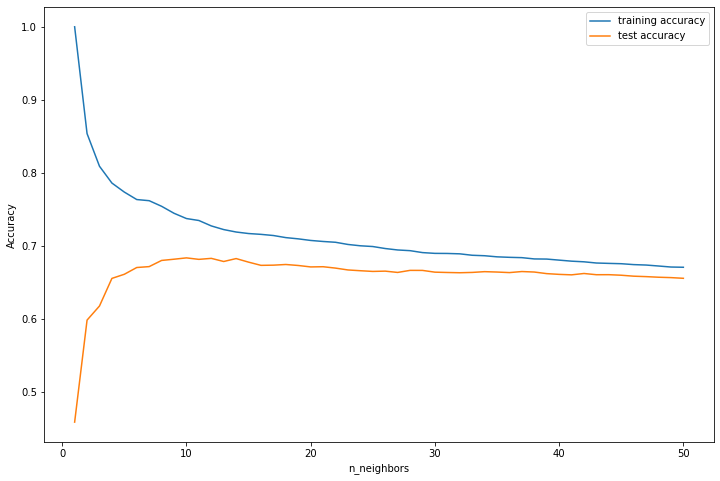

The optimal number of neighbors is 10


In [125]:
#KNN
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [126]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.7375
KNN Testing Score : 0.6837
KNN Train-Test Gap: 0.0538


KNN Standardized did not show better results than the OLS and with a gap bigger than the other models.

<h2>Final Result</h2><br>

In [158]:
# comparing results

print(f"""
Model        Train Score      Test Score         Train-Test Gap      Model Size 
-----        -----------      ----------         --------------      ------------
OLS         {lr_train_score}           {lr_test_score}             {lr_test_gap}                {len(lr_model_lst)}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS'],
           
    'Training' : [lr_train_score],
           
    'Testing'  : [lr_test_score],
                    
    'Train-Test Gap' : [lr_test_gap],
                    
    'Model Size' : [len(lr_model_lst)],
                    
    'Model' : [lr_model_lst]}

print(f"""

Model Coefficients and Variables are as follow:
""")
for pair in lr_model_lst:
    print(pair)


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model        Train Score      Test Score         Train-Test Gap      Model Size 
-----        -----------      ----------         --------------      ------------
OLS         0.7648           0.7639             0.0009                19




Model Coefficients and Variables are as follow:

('intercept', 2.25)
('TOTAL_MEALS_ORDERED', -0.0)
('UNIQUE_MEALS_PURCH', 0.05)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.01)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.03)
('MEDIAN_MEAL_RATING', 0.06)
('TOTAL_MEALS_ORDERED_range', -0.08)
('LARGEST_ORDER_SIZE_range', 0.0)
('MEDIAN_MEAL_RATING_range', -0.0)
('MASTER_CLASSES_ATTENDED_range', 0.04)
('log_UNIQUE_MEALS_PURCH', -0.18)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.14)
('log_PRODUCT_CATEGORIES_VIEWED', -0.08)
('log_LARGEST_ORDER_SIZE', 0.22)
('DISCOUNT', 0.0)
('log_AVG_UNIQUE_ORDERS', 0.44)
('LATE_OVER_TOTALMEALS', -0.07)


After a thorough analysis, the final conclusion was decided that the best model that uses the combination of variables seen before is the OLS model, it reaches a training and testing score above 0.80
With the use of these variables we are able to predict the outcome of revenue from each customer.

In [128]:
prediction_results = pd.DataFrame(data = {
    'Original REVENUE'     : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    })


#prediction_results.to_excel(excel_writer = './OLS_linear_model_predictions.xlsx',
#                            index = False)

prediction_results.head(n=5)

,Original REVENUE,LR Predictions,LR Deviation
640,3.000000,2.95,-0.050000
49,2.809560,2.81,0.000440
1307,3.240549,3.28,0.039451
914,3.398374,3.22,-0.178374
803,3.629410,3.40,-0.229410
